# Text Analysis of Disney Billboard Top 100 songs

The main objective of this task is to determine the top 30 words frequently used in Disney Animation Song lyrics. The data is restricted to songs that have chartted on the Billboard Top.  

Since this is a Natural Language Processing, I will use the <code>nltk</code> python package

To achieve this, we will go throught the following steps

 - import the required libraries
 - load the csv file
 - Preprocess the data
 - Text Mining
   - Text Tokenization
   - Stop Words

 - Analysis
 - Visualization
    - Word cloud
    - bar chart
    - Density plot

In [1]:
import nltk
import pandas as pd
import numpy as np
import string
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data and preprocess it.

In [2]:
df = pd.read_csv('disney_songs.csv', encoding='unicode_escape')
df.head()

,No.,Song,Movie,Year,Lyrics,Highest Rank
0,1,We Dont Talk About Bruno,Encanto,2022,"We don't talk about Bruno, no, no, no\nWe don'...",1
1,2,Can You Feel the Love Tonight,The Lion King,1994,I can see what's happening\nWhat\nAnd they don...,4
2,3,A Whole New World,Aladdin,1993,"I can show you the world\nShining, shimmering,...",1
3,4,Let It Go,Frozen,2014,The snow glows white on the mountain tonight\n...,5
4,5,Colors of the Wind,Pocahontas,1995,You think you own whatever land you land on\nT...,4


- <code> Song </code> - The title of the Song. </br>
- <code> Movie </code> - The Disney movie the song belongs to.</br>
- <code> Year </code> - The Year the movie/song was released.</br>
- <code> Lyrics </code> - The lyrics of the song.</br>
- <code> Higest Rank </code> - The rank on the Billboard Chart.</br>

The text analysis will be mainly center on the lyrics. The other columns will be used during the visualization section.

The Lyrics have special characters, puntuation and numbers, which in the case, isn't really neccessary. These words were removed. The 

In [3]:
#The dtype of Year is changed from an object to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

## Overall Text cleaning and Analysis

### Tokenization
 __Tokenization__ is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [4]:
token_lyrics = df['Lyrics'].str.lower()\
                           .str.replace("'",'',regex=True)\
                           .apply(lambda x: x.split())
token_lyrics.head()

0    [we, dont, talk, about, bruno,, no,, no,, no, ...
1    [i, can, see, whats, happening, what, and, the...
2    [i, can, show, you, the, world, shining,, shim...
3    [the, snow, glows, white, on, the, mountain, t...
4    [you, think, you, own, whatever, land, you, la...
Name: Lyrics, dtype: object

### STOP WORDS

The idea of <b>Stop Words</b> is simply removing the words that occur commonly across all the documents in the data. These are typically, articles and pronouns. These words are not always useless, but for this analysis, I would like to remove them to give more focus to the "more important" words.

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(stop_words)

{'because', 'under', 'the', 'didn', "she's", 'it', 'by', 'but', 'being', 'be', 'to', 'then', 'he', 'this', "shan't", 'off', 'them', 'll', 'which', "you'll", 'or', 'needn', 'doing', 'once', 'her', 'no', 'both', "you're", 'do', 'mustn', 'about', 'm', 'won', 'were', 'did', 'of', 'is', 'into', 'between', 'had', "you'd", 'more', "hadn't", 'don', 'while', 'shan', "hasn't", 'your', 'nor', 'haven', 'hadn', 'with', 'whom', 'been', 'why', 'only', 'you', 'down', 'him', 'ourselves', 'yours', 'has', 'does', "don't", 'above', 'couldn', 'are', "wouldn't", 'that', 'hasn', 'now', 'weren', "isn't", 'over', 'we', 'myself', 've', 'd', 'y', 'am', 'here', "doesn't", 'o', 'very', 'against', 'not', 'herself', 'our', 'through', 'who', 'than', "shouldn't", "wasn't", 'ours', 'himself', 'isn', 'for', 'again', 'yourself', 'until', 'they', 'wasn', 'themselves', 'an', "mightn't", 'have', 'after', 'aren', 'and', "didn't", 'mightn', 'its', 'i', 'on', 'doesn', 'before', 'own', 'when', 'she', "couldn't", 'such', "mustn'

In [7]:
#Removing Stopwords
token_lyrics = token_lyrics.apply(lambda x : [w for w in x if not w in stop_words])

In [8]:
#now lets stitch these tokens back together. 
for i in range(len(token_lyrics)):
    token_lyrics[i] = ' '.join(token_lyrics[i])
df['clean_lyrics'] = token_lyrics

In [9]:
df.head()

,No.,Song,Movie,Year,Lyrics,Highest Rank,clean_lyrics
0,1,We Dont Talk About Bruno,Encanto,2022,"We don't talk about Bruno, no, no, no\nWe don'...",1,"dont talk bruno, no, no, dont talk bruno, wedd..."
1,2,Can You Feel the Love Tonight,The Lion King,1994,I can see what's happening\nWhat\nAnd they don...,4,see whats happening dont clue theyll fall love...
2,3,A Whole New World,Aladdin,1993,"I can show you the world\nShining, shimmering,...",1,"show world shining, shimmering, splendid tell ..."
3,4,Let It Go,Frozen,2014,The snow glows white on the mountain tonight\n...,5,snow glows white mountain tonight footprint se...
4,5,Colors of the Wind,Pocahontas,1995,You think you own whatever land you land on\nT...,4,think whatever land land earth dead thing clai...


Even with the Stop words removed, <code>clean_lyrics</code> still shows some stop words present. The next step is to remove these remaining stop words and words less than 3 letters, as well as special characters.

In [10]:
df['clean_lyrics'] = df['clean_lyrics'].str.replace("([\\n:.?<_&=>0-9;,\-()\"])", " ", regex=True)
df['clean_lyrics'] = df['clean_lyrics'].apply(lambda x:" ".join([w for w in str(x).split() if len(w) > 3]))

### Analysis and Visualization
For the Analysis, I would like to know;
1. The frequency of the words in the dataset and the percentage with which they appear.
2. The frequency of the distinct word per song and the percentage with which they appear.
3. The top 3 words per song

For visualization
1. Word cloud
2. Bar Chart for both the overall lyrics and reduced lyrics

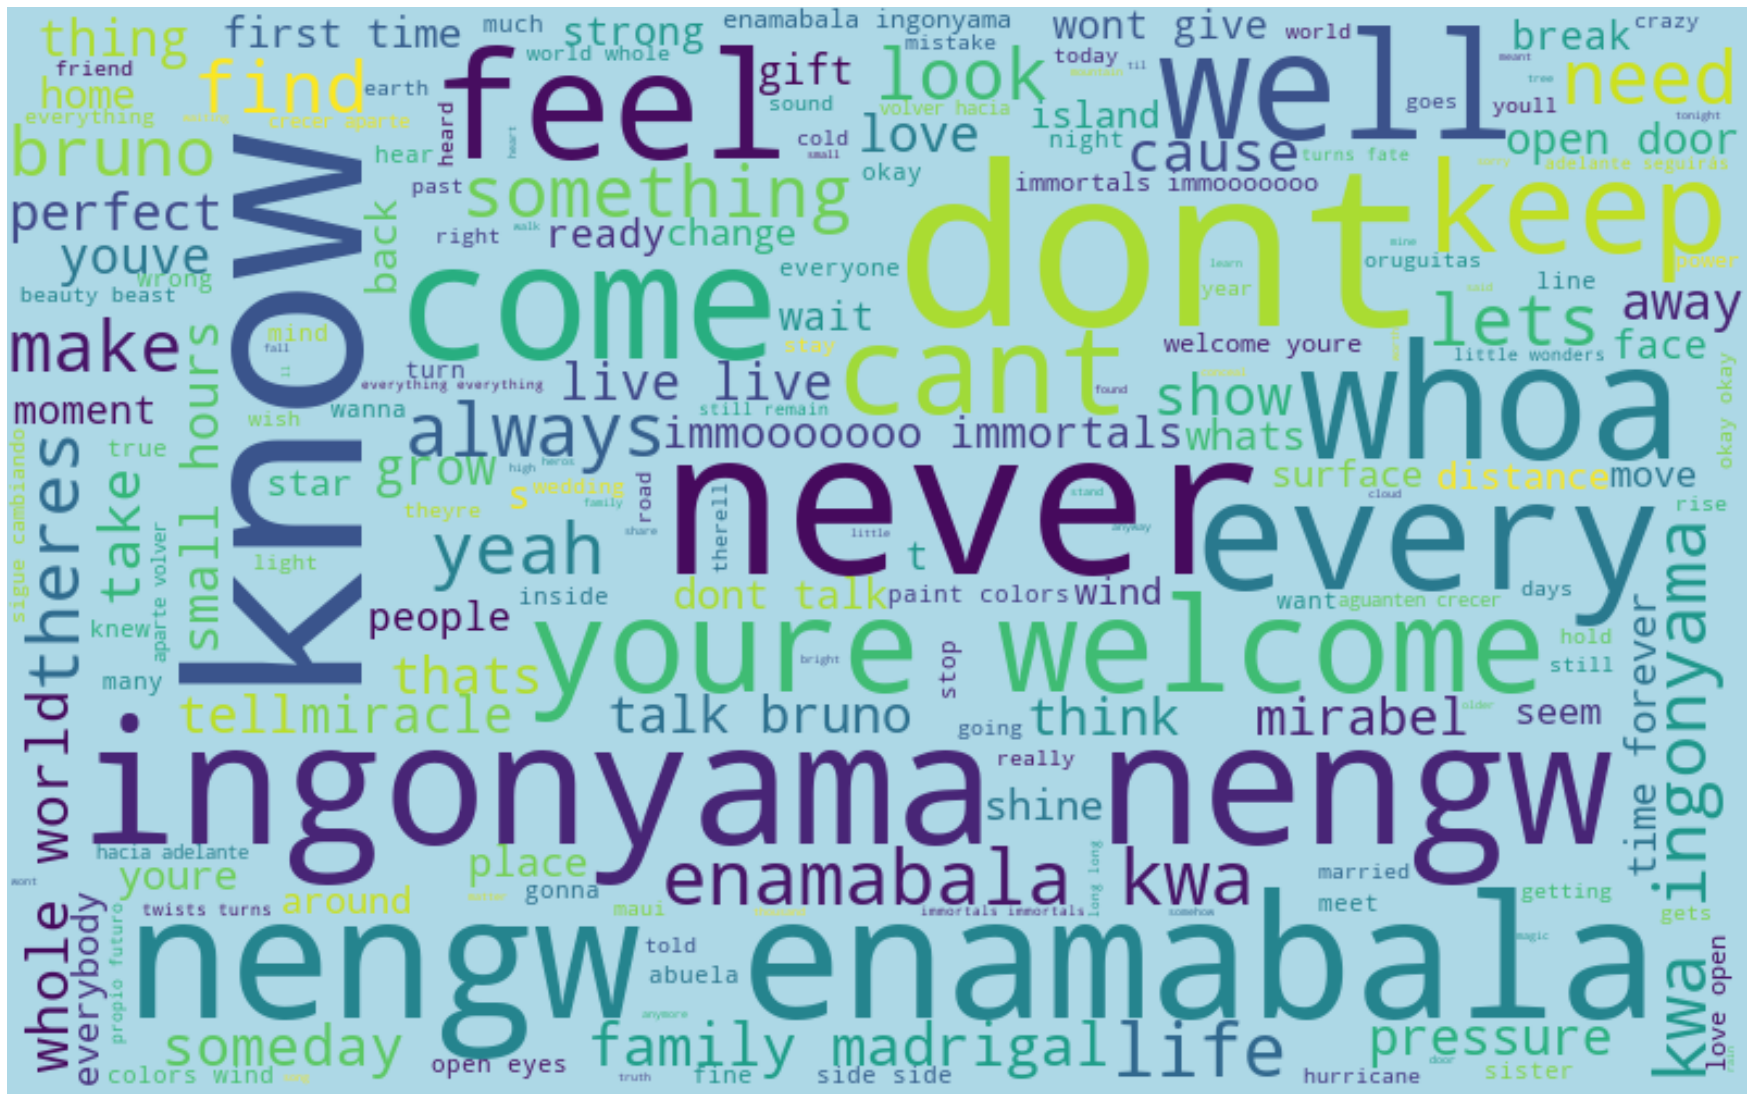

In [11]:
all_words = ' '.join([text for text in df['clean_lyrics']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=20, 
                      max_font_size=110, 
                      background_color = 'lightblue').generate(all_words)
plt.figure(figsize=(40, 20)) 
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

In [12]:
lyric_freq = df['clean_lyrics'].str.split(expand=True).stack().value_counts().reset_index()
lyric_freq.columns = ['Word', 'Frequency']

In [13]:
lyric_freq["%_of_lyric"] = ((lyric_freq['Frequency']/sum(lyric_freq['Frequency']))*100).round(2)

In [14]:
lyric_freq.head(20)

,Word,Frequency,%_of_lyric
0,dont,54,1.51
1,like,48,1.34
2,know,47,1.31
3,never,40,1.12
4,youre,35,0.98
5,ingonyama,31,0.87
6,bruno,25,0.70
7,nengw,25,0.70
8,enamabala,25,0.70
9,time,25,0.70


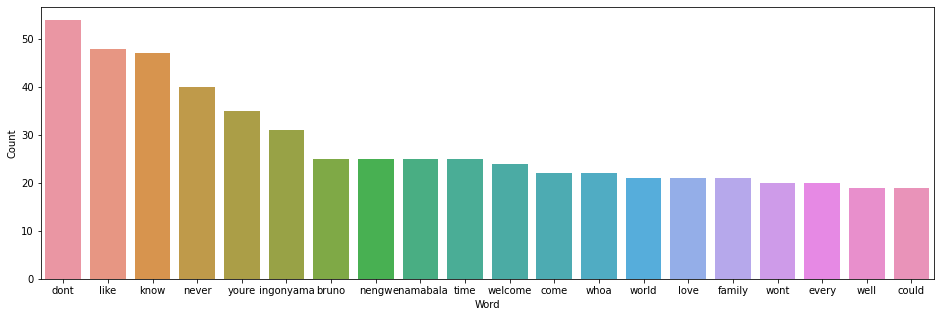

In [15]:
e = lyric_freq.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Word", y="Frequency")
ax.set(ylabel = 'Count')
plt.show()

 We now want to reduce the frequency of the lyrics per song to one.

In [16]:
df['reduced_lyrics'] = df['clean_lyrics'].str.split(' ').apply(set).str.join(' ')

In [17]:
df.head()

,No.,Song,Movie,Year,Lyrics,Highest Rank,clean_lyrics,reduced_lyrics
0,1,We Dont Talk About Bruno,Encanto,2022,"We don't talk about Bruno, no, no, no\nWe don'...",1,dont talk bruno dont talk bruno wedding weddin...,isabela really fate seven back allowed sand sc...
1,2,Can You Feel the Love Tonight,The Lion King,1994,I can see what's happening\nWhat\nAnd they don...,4,whats happening dont clue theyll fall love her...,evening know dont make impossible whats past t...
2,3,A Whole New World,Aladdin,1993,"I can show you the world\nShining, shimmering,...",1,show world shining shimmering splendid tell pr...,chase soaring ride anywhere dont shining wondr...
3,4,Let It Go,Frozen,2014,The snow glows white on the mountain tonight\n...,5,snow glows white mountain tonight footprint se...,rules heaven back past keep rise care turn you...
4,5,Colors of the Wind,Pocahontas,1995,You think you own whatever land you land on\nT...,4,think whatever land land earth dead thing clai...,walk still trails berries brothers grinned ask...


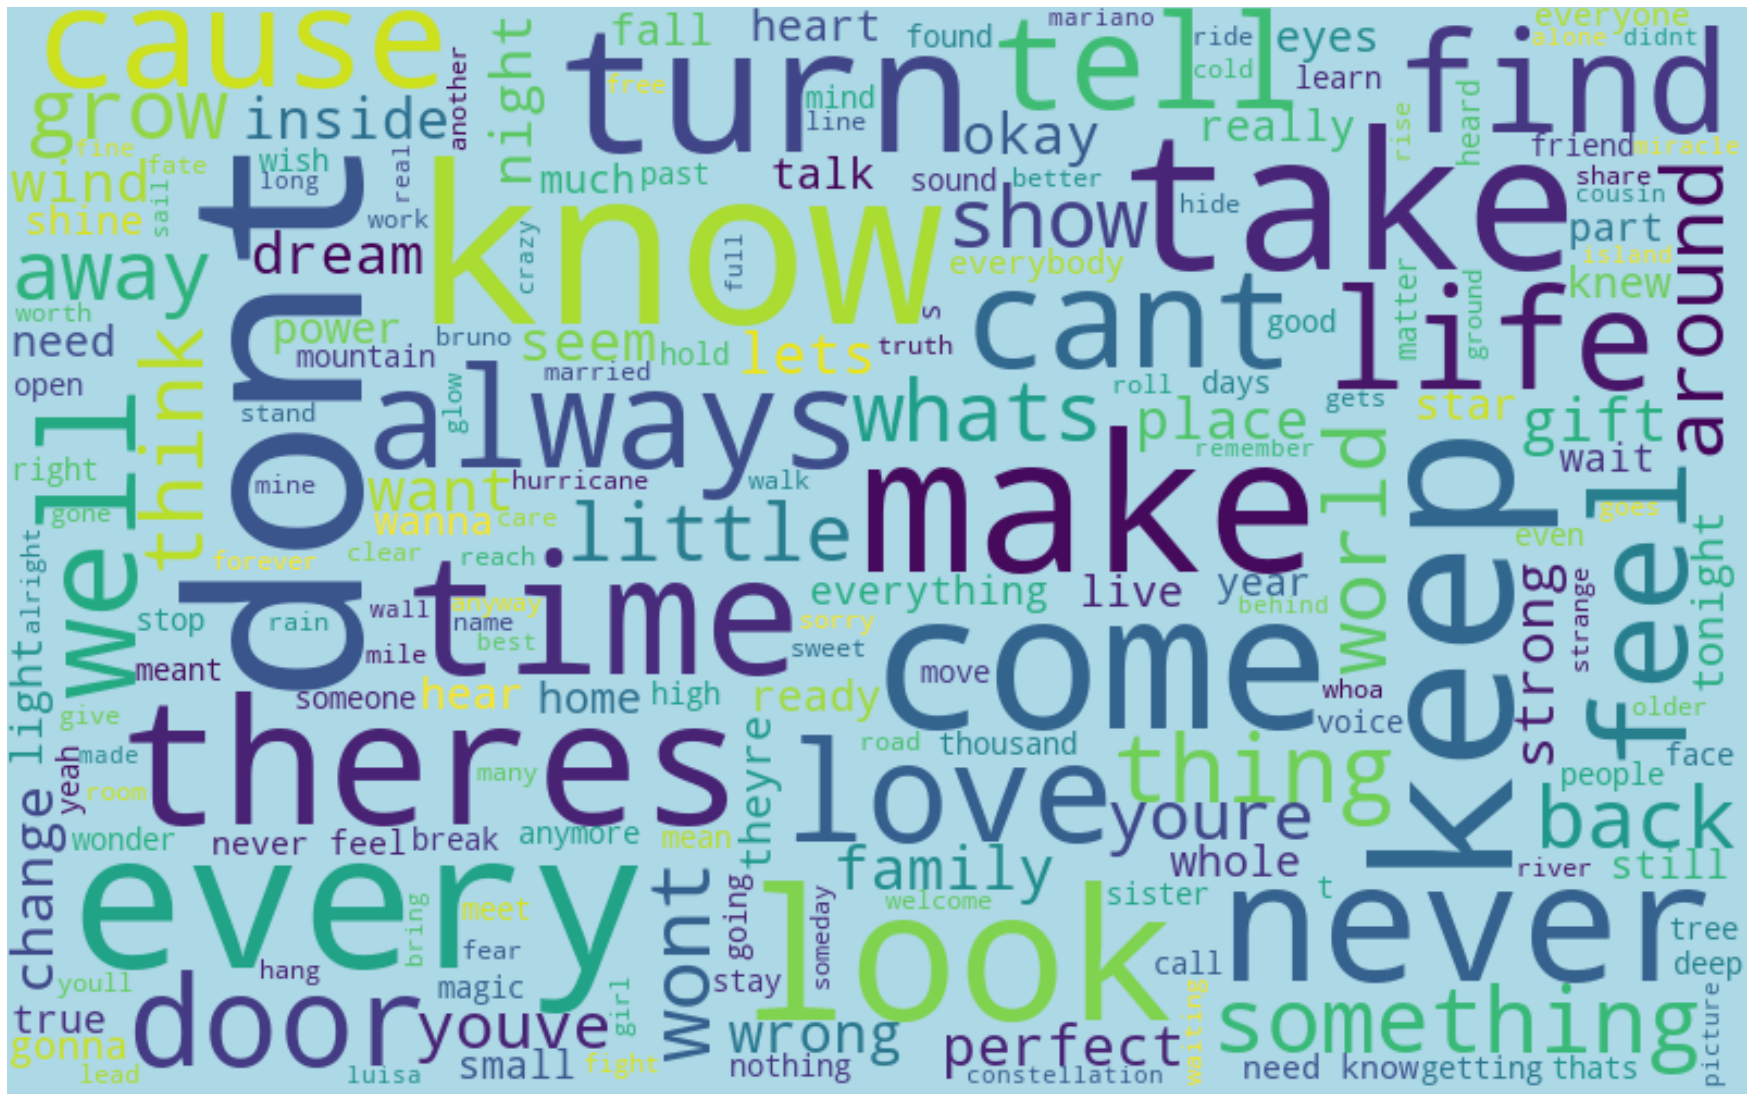

In [18]:
all_words2 = ' '.join([text for text in df['reduced_lyrics']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=20, 
                      max_font_size=110, 
                      background_color = 'lightblue').generate(all_words2)
plt.figure(figsize=(40, 20)) 
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

In [19]:
lyric_freq2 = df['reduced_lyrics'].str.split(expand=True).stack().value_counts().reset_index()
lyric_freq2.columns = ['Word', 'Frequency2']

In [20]:
lyric_freq2["%_of_lyric2"] = ((lyric_freq2['Frequency2']/sum(lyric_freq2['Frequency2']))*100).round(2)

In [21]:
lyric_freq2.head(20)

,Word,Frequency2,%_of_lyric2
0,dont,19,0.90
1,know,18,0.85
2,like,16,0.76
3,never,14,0.66
4,come,12,0.57
5,every,12,0.57
6,feel,11,0.52
7,theres,10,0.47
8,need,10,0.47
9,take,10,0.47


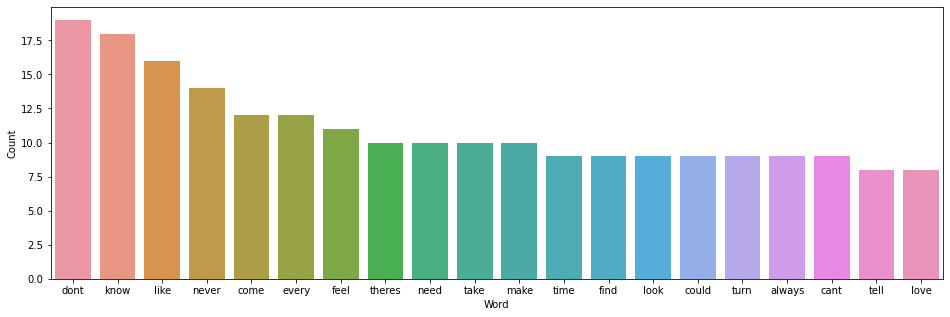

In [22]:
e = lyric_freq2.nlargest(columns = "Frequency2", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Word", y="Frequency2")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
freq = lyric_freq.merge(lyric_freq2, on = 'Word', how='left')

In [24]:
freq['Freq_diff'] = freq['Frequency'] - freq['Frequency2']

In [25]:
freq.head(20)

,Word,Frequency,%_of_lyric,Frequency2,%_of_lyric2,Freq_diff
0,dont,54,1.51,19,0.90,35
1,like,48,1.34,16,0.76,32
2,know,47,1.31,18,0.85,29
3,never,40,1.12,14,0.66,26
4,youre,35,0.98,7,0.33,28
5,ingonyama,31,0.87,1,0.05,30
6,bruno,25,0.70,3,0.14,22
7,nengw,25,0.70,1,0.05,24
8,enamabala,25,0.70,1,0.05,24
9,time,25,0.70,9,0.42,16


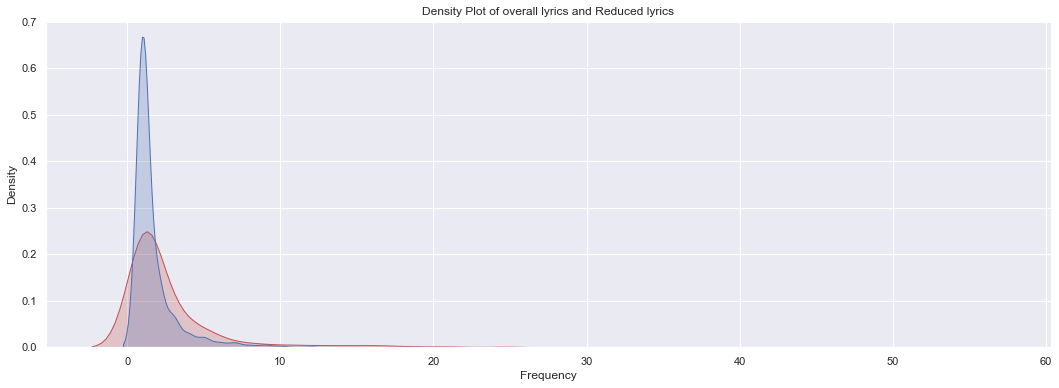

In [26]:
sns.set(style="darkgrid",rc = {'figure.figsize':(18,6)})

# plotting both distibutions on the same figure
fig = sns.kdeplot(freq['Frequency'], shade=True, color="r")
fig = sns.kdeplot(freq['Frequency2'], shade=True, color="b")
plt.title('Density Plot of overall lyrics and Reduced lyrics')
plt.show()

In [27]:
freq.describe()

,Frequency,%_of_lyric,Frequency2,%_of_lyric2,Freq_diff
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,2.950577,0.083904,1.744646,0.083674,1.205931
std,4.567984,0.127032,1.755650,0.082003,3.310843
min,1.000000,0.030000,1.000000,0.050000,0.000000
25%,1.000000,0.030000,1.000000,0.050000,0.000000
50%,1.000000,0.030000,1.000000,0.050000,0.000000
75%,3.000000,0.080000,2.000000,0.090000,1.000000
max,54.000000,1.510000,19.000000,0.900000,35.000000


There are a few observations from the Analysis and Visualization.
- The Average frequency for both the overall and reduced lyrics were in the ones.
</br>

- The some words have pretty high frequency in the overall cummulation, but a frequency of one in the reduced/distinct words column. This is because, they were repeated constantly in the song. These words make up a large part of the respective songs. <code>Ingonyama enamabala</code> have a frequency of <b>31</b> and <b>25</b> respectively, but only have a frequency of <b>1</b> in the reduced lyrics column.
</br>

- The frequency of the reduced lyrics, also gives an idea of how many songs the particular word was used in, for instance, the highest word is <code>dont</code> has a frequency of <b>19</b> in <code>Frequency2</code>, this means it was used in 19 of the songs, whilst words that have a frequency of <b>1</b> were only used in one Song.